# A3.1 SVM y Multiple Testing

En esta actividad se trabajará con una base de datos que consiste de 83 muestras y 2308 variables de entrada, que consisten en la expresión génica estandarizada de distintos genes. La variable de salida cuenta con valores numéricos del 1 al 4 que corresponden a distintos tipos de cáncer.

Para comenzar con el análisis, se importaron los datos de expresión génica. Se verificó la integridad del conjunto de datos mediante la búsqueda de valores faltantes. 

In [2]:
import pandas as pd
import numpy as np

# Cargar los datos (ajusta el nombre del archivo si es necesario)
df = pd.read_csv('A3.1 Khan.csv')

# Verificar si hay valores faltantes
print("Valores nulos: ", df.isnull().values.any())



Valores nulos:  False


Al no encontrarse huecos (NaN), se procedió con el análisis estadístico.

Se filtraron las muestras correspondientes a las clases 2 y 4, con el objetivo de comparar sus perfiles de expresión génica. Para cada gen, se calculó la diferencia absoluta entre los promedios de expresión en estas dos clases. A partir de estos resultados, se identificaron los 10 genes cuya diferencia de medias fue la mayor.

In [3]:
# Separar datos de entrada (genes) y salida (tipo de cáncer)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]  # Asumimos que la última columna es la clase (1-4)

# Filtrar solo las clases 2 y 4
X_2 = X[y == 2]
X_4 = X[y == 4]

# Calcular diferencia de medias para cada gen
mean_diff = (X_2.mean() - X_4.mean()).abs()

# Obtener los 10 genes con mayor diferencia
top10_diff_genes = mean_diff.sort_values(ascending=False).head(10)
print("Top 10 genes con mayor diferencia de medias entre clase 2 y 4:")
print(top10_diff_genes)

# Posible implicación en inferencia:
# Genes con alta diferencia de medias podrían estar involucrados en mecanismos distintos entre tipos de cáncer.

Top 10 genes con mayor diferencia de medias entre clase 2 y 4:
X187     3.323151
X509     2.906537
X2046    2.424515
X2050    2.401783
X129     2.165185
X1645    2.065460
X1319    2.045941
X1955    2.037340
X1003    2.011337
X246     1.837830
dtype: float64


Este análisis nos muestra que cuando hay una alta diferencia de medias entre clases se podría significar que dichos genes se comportan de manera diferencial entre los dos tipos de cáncer considerados. Aqui se muestra que problablemente los genes 187, 509, 2046, 2050 y 129 son genes que están mas asociados a mecanismos biológicos diferentes y, por tanto, podrían representar biomarcadores potenciales o blancos terapéuticos específicos para cada subtipo.

Con el objetivo de determinar qué genes presentan una diferencia significativa en sus niveles de expresión entre las clases 2 y 4, se realizó una prueba t de Student para cada uno de los 2308 genes. Esta prueba permite evaluar si las medias de dos grupos independientes difieren de forma estadísticamente significativa.

Dado que se realizan múltiples pruebas (una por cada gen), se aplicaron tres métodos distintos para controlar el error de tipo I asociado a pruebas múltiples, utilizando un umbral de significancia de α = 0.05:


In [4]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Prueba t para cada gen entre clases 2 y 4
t_stats = []
p_values = []

for gene in X.columns:
    stat, p = ttest_ind(X_2[gene], X_4[gene], equal_var=False)
    t_stats.append(stat)
    p_values.append(p)

# Corrección de múltiples pruebas
alpha = 0.05

# Bonferroni
_, bonf_pvals, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')
bonf_significant = np.array(X.columns)[bonf_pvals < alpha]

# Holm
_, holm_pvals, _, _ = multipletests(p_values, alpha=alpha, method='holm')
holm_significant = np.array(X.columns)[holm_pvals < alpha]

# Benjamini-Hochberg (FDR)
_, bh_pvals, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')
bh_significant = np.array(X.columns)[bh_pvals < alpha]

print("Genes significativos con Bonferroni:", bonf_significant)
print("Genes significativos con Holm:", holm_significant)
print("Genes significativos con Benjamini-Hochberg:", bh_significant)



Genes significativos con Bonferroni: ['X2' 'X36' 'X67' 'X129' 'X174' 'X187' 'X188' 'X229' 'X246' 'X251' 'X338'
 'X348' 'X368' 'X372' 'X373' 'X380' 'X430' 'X433' 'X509' 'X545' 'X554'
 'X558' 'X566' 'X603' 'X655' 'X714' 'X762' 'X910' 'X951' 'X971' 'X1003'
 'X1021' 'X1023' 'X1055' 'X1070' 'X1093' 'X1105' 'X1110' 'X1112' 'X1132'
 'X1194' 'X1196' 'X1207' 'X1217' 'X1298' 'X1319' 'X1327' 'X1330' 'X1372'
 'X1389' 'X1416' 'X1610' 'X1626' 'X1634' 'X1645' 'X1706' 'X1708' 'X1723'
 'X1738' 'X1799' 'X1888' 'X1896' 'X1911' 'X1924' 'X1954' 'X1955' 'X1980'
 'X2046' 'X2050' 'X2115' 'X2146' 'X2247']
Genes significativos con Holm: ['X2' 'X36' 'X67' 'X129' 'X174' 'X187' 'X188' 'X229' 'X246' 'X251' 'X338'
 'X348' 'X368' 'X372' 'X373' 'X380' 'X430' 'X433' 'X509' 'X545' 'X554'
 'X558' 'X566' 'X603' 'X655' 'X714' 'X762' 'X910' 'X951' 'X971' 'X1003'
 'X1021' 'X1023' 'X1055' 'X1070' 'X1093' 'X1105' 'X1110' 'X1112' 'X1132'
 'X1194' 'X1196' 'X1207' 'X1217' 'X1298' 'X1319' 'X1327' 'X1330' 'X1372'
 'X1389' 'X1416' '

Tras aplicar estas correcciones, se identificaron los genes cuya expresión es significativamente distinta entre las clases 2 y 4 según cada método. Los resultados permiten priorizar aquellos genes con mayor evidencia estadística de diferenciación, siendo candidatos relevantes para estudios posteriores en diagnóstico o investigación biomédica. 

Podemos observar de los resultados que Bonferonni y de Holm llegaron a resultados bastante similares si no es que iguales, mientras que el metodo Benjamini-Hochberg resulto en una mas grande cantidad de variables.

Con el propósito de extender el análisis comparativo a las cuatro clases de cáncer presentes en el conjunto de datos, se realizó un experimento similar al anterior, pero utilizando el análisis de varianza (ANOVA). A diferencia de la prueba t, que compara medias entre dos grupos, ANOVA permite evaluar si existen diferencias significativas en las medias de más de dos grupos simultáneamente.

Para llevar a cabo esta prueba, se utilizó la función f_oneway del módulo scipy.stats, la cual requiere como entrada los valores de expresión génica estratificados por clase. Por lo tanto, se organizó la información del conjunto de datos separando las muestras de cada clase (1, 2, 3 y 4) y agrupando las expresiones génicas correspondientes a cada gen.

El resultado de la prueba ANOVA para cada gen consiste en un estadístico F y un p-value asociado, el cual indica la probabilidad de observar una variabilidad tan grande entre grupos simplemente por azar. De nuevo, dado que se realizan múltiples pruebas (una por gen), se aplicaron correcciones por comparaciones múltiples para mantener el control del error de tipo I.

In [5]:
from scipy.stats import f_oneway

# Obtener datos estratificados por clase
grouped_data = [X[y == cls] for cls in sorted(y.unique())]

# Prueba ANOVA para cada gen
anova_pvalues = []
for gene in X.columns:
    gene_values_by_class = [group[gene] for group in grouped_data]
    _, p = f_oneway(*gene_values_by_class)
    anova_pvalues.append(p)

# Corrección Benjamini-Hochberg como ejemplo
_, anova_corrected, _, _ = multipletests(anova_pvalues, alpha=0.05, method='fdr_bh')
significant_genes_anova = np.array(X.columns)[anova_corrected < 0.05]

print("Genes con diferencias significativas entre las 4 clases (ANOVA):")
print(significant_genes_anova)
# imprimir numeros de genes significativos
print("Número de genes significativos:", len(significant_genes_anova))


Genes con diferencias significativas entre las 4 clases (ANOVA):
['X1' 'X2' 'X3' ... 'X2302' 'X2303' 'X2304']
Número de genes significativos: 1162


Podemos observar de los resultados que se identifican que casi la mitad de las variables tienen diferencias entre si que podrian ayudar a identificar los diferentes tipos de cancer.

Para esta sección, se procedió a construir y entrenar modelos de clasificación utilizando máquinas de vectores de soporte, con el fin de predecir el tipo de cáncer a partir de los datos de expresión génica.

Primero, se dividió el conjunto de datos en entrenamiento y prueba. Dado el alto número de variables, y para evitar tiempos de cómputo excesivos, se seleccionó un subconjunto de genes con base en los análisis estadísticos realizados en los puntos anteriores. Esta no es una práctica adecuada, pues estamos cayendo en una situación de fuga de datos. Lo ideal sería que la selección de características se basara solamente en experimentos realizados con los datos de entrenamiento. Pero, en este caso, obviaremos este detalle.

Se entrenaron tres modelos SVM con los kernels lineal, polinomial de grado 3y radial.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Para reducir el tiempo de cómputo
X_reduced = X[bonf_significant]

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

# SVM kernel lineal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# SVM kernel polinomial grado 3
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

# SVM kernel radial (RBF)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)



SVC()

Una vez entrenados los tres modelos SVM con diferentes kernels (lineal, polinomial de grado 3 y radial), se procedió a evaluar su desempeño utilizando el conjunto de prueba.

Para la comparación, se calcularon varias métricas relevantes en tareas de clasificación multiclase.



=== Resultados para SVM con kernel lineal ===
Accuracy: 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000         5
           2     1.0000    1.0000    1.0000         6
           3     1.0000    1.0000    1.0000         8
           4     1.0000    1.0000    1.0000         6

    accuracy                         1.0000        25
   macro avg     1.0000    1.0000    1.0000        25
weighted avg     1.0000    1.0000    1.0000        25



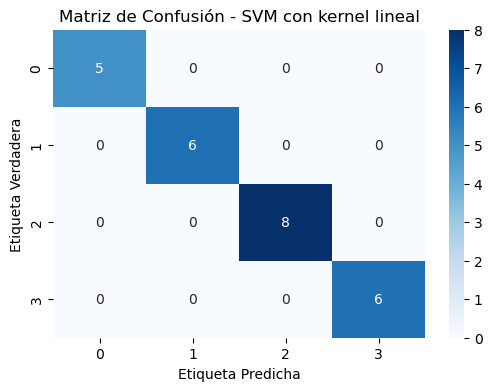


=== Resultados para SVM con kernel polinomial (grado 3) ===
Accuracy: 0.9600

Reporte de clasificación:
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000         5
           2     1.0000    1.0000    1.0000         6
           3     1.0000    0.8750    0.9333         8
           4     0.8571    1.0000    0.9231         6

    accuracy                         0.9600        25
   macro avg     0.9643    0.9688    0.9641        25
weighted avg     0.9657    0.9600    0.9602        25



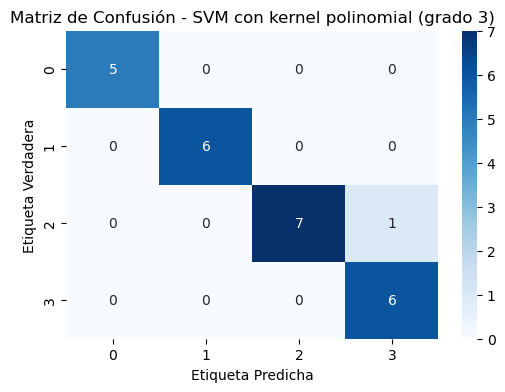


=== Resultados para SVM con kernel radial (RBF) ===
Accuracy: 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000         5
           2     1.0000    1.0000    1.0000         6
           3     1.0000    1.0000    1.0000         8
           4     1.0000    1.0000    1.0000         6

    accuracy                         1.0000        25
   macro avg     1.0000    1.0000    1.0000        25
weighted avg     1.0000    1.0000    1.0000        25



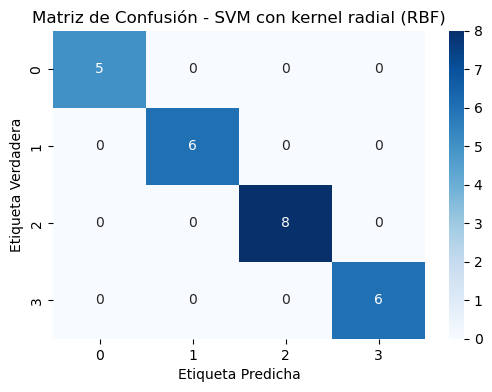

In [12]:
# Importar métricas de evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Función para evaluar y mostrar métricas
def evaluar_modelo(nombre_modelo, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    
    print(f"\n=== Resultados para {nombre_modelo} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred, digits=4))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.show()

# Evaluar los tres modelos
evaluar_modelo("SVM con kernel lineal", svm_linear, X_test, y_test)
evaluar_modelo("SVM con kernel polinomial (grado 3)", svm_poly, X_test, y_test)
evaluar_modelo("SVM con kernel radial (RBF)", svm_rbf, X_test, y_test)



Los resultados obtenidos fueron notablemente altos, especialmente para el modelo con kernel lineal y radial, que alcanzaron un 100% de precisión, recall y F1-score en todas las clases, y un accuracy total de 1.0000. El modelo con kernel polinomial también tuvo buenos resultados, con un accuracy del 96% nada mas equivocandose en una clasificacion.

Aunque estos resultados parecen excelentes, es importante considerar algunas precauciones metodológicas que podrían estar influyendo en el rendimiento observado:

La selección de las variables utilizadas como entrada al modelo se realizó antes de separar los datos en entrenamiento y prueba. Esto significa que los modelos podrían estar aprovechando información que normalmente no deberían tener al momento de entrenarse.

Otro factor a considerar es que el conjunto de prueba fue relativamente pequeño (25 observaciones), lo cual limita la capacidad de generalización de los resultados. En contextos con pocos datos, es posible que los modelos se ajusten demasiado a las características específicas de esas muestras, lo que también puede inflar artificialmente el rendimiento.

Se utilizó ChatGPT para la generación del código y parte de la redacción de pasos.

**Firma de honor:** "Doy mi palabra que he realizado esta actividad con integridad académica" - Daniel Matthieu Potes Lesoinne #584678